<a href="https://colab.research.google.com/github/TyamanovaMargo/DI-Bootcamp/blob/main/pokemon_DC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# load and merge

pokemon = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp/Pokemons/pokemon.csv')
combats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bootcamp/Pokemons/combats.csv')

In [7]:
print(pokemon.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')


In [8]:
print(combats.columns)

Index(['First_pokemon', 'Second_pokemon', 'Winner'], dtype='object')


In [11]:
# baseed on id ( is # in pokemon) add id in combat
combats = combats.merge(pokemon, left_on='First_pokemon', right_on='#', suffixes=('_first', '_second'))
combats = combats.merge(pokemon, left_on='Second_pokemon', right_on='#', suffixes=('_first', '_second'))

In [14]:
print(combats.head())



   First_pokemon  Second_pokemon  Winner  #_first Name_first Type 1_first  \
0            266             298     298      266   Larvitar         Rock   
1            702             701     701      702   Virizion        Grass   
2            191             668     668      191    Togetic        Fairy   
3            237             683     683      237     Slugma         Fire   
4            151             231     151      151    Omastar         Rock   

  Type 2_first  HP_first  Attack_first  Defense_first  ...  Type 1_second  \
0       Ground        50            64             50  ...          Grass   
1     Fighting        91            90             72  ...           Rock   
2       Flying        55            40             85  ...        Psychic   
3          NaN        40            40             40  ...         Dragon   
4        Water        70            60            125  ...            Bug   

   Type 2_second  HP_second  Attack_second  Defense_second  Sp. Atk_second

In [15]:
print(combats.columns)

Index(['First_pokemon', 'Second_pokemon', 'Winner', '#_first', 'Name_first',
       'Type 1_first', 'Type 2_first', 'HP_first', 'Attack_first',
       'Defense_first', 'Sp. Atk_first', 'Sp. Def_first', 'Speed_first',
       'Generation_first', 'Legendary_first', '#_second', 'Name_second',
       'Type 1_second', 'Type 2_second', 'HP_second', 'Attack_second',
       'Defense_second', 'Sp. Atk_second', 'Sp. Def_second', 'Speed_second',
       'Generation_second', 'Legendary_second'],
      dtype='object')


In [16]:
#missing values

pokemon.isnull().mean().sort_values(ascending=False)

,0
Type 2,0.48250
Name,0.00125
#,0.00000
Type 1,0.00000
HP,0.00000
Attack,0.00000
Defense,0.00000
Sp. Atk,0.00000
Sp. Def,0.00000
Speed,0.00000


In [18]:
#Fill the missing Name for Pokemon #62 (Primeape).
pokemon.loc[pokemon['#'] == 62, 'Name'] = 'Primeape'


#Handle NaN values in Type 2 (mark as “None” if missing).
pokemon['Type 2'] = pokemon['Type 2'].fillna('None')

In [21]:
print(pokemon.loc[pokemon['#'] == 62])  # Проверяем Primeape
print(pokemon['Type 2'].isna().sum())
pokemon.isnull().mean().sort_values(ascending=False)

     #      Name    Type 1 Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
61  62  Primeape  Fighting   None  40      80       35       35       45   

    Speed  Generation  Legendary  
61     70           1      False  
0


,0
Name,0.00125
#,0.00000
Type 1,0.00000
Type 2,0.00000
HP,0.00000
Attack,0.00000
Defense,0.00000
Sp. Atk,0.00000
Sp. Def,0.00000
Speed,0.00000


In [23]:
#  still have some mising values in Name
pokemon['Name'] = pokemon['Name'].fillna('Unknown')


print(pokemon['Name'].unique())  # check uniq

print(pokemon['Name'].isna().sum())



['Bulbasaur' 'Ivysaur' 'Venusaur' 'Mega Venusaur' 'Charmander'
 'Charmeleon' 'Charizard' 'Mega Charizard X' 'Mega Charizard Y' 'Squirtle'
 'Wartortle' 'Blastoise' 'Mega Blastoise' 'Caterpie' 'Metapod'
 'Butterfree' 'Weedle' 'Kakuna' 'Beedrill' 'Mega Beedrill' 'Pidgey'
 'Pidgeotto' 'Pidgeot' 'Mega Pidgeot' 'Rattata' 'Raticate' 'Spearow'
 'Fearow' 'Ekans' 'Arbok' 'Pikachu' 'Raichu' 'Sandshrew' 'Sandslash'
 'Nidoran♀' 'Nidorina' 'Nidoqueen' 'Nidoran♂' 'Nidorino' 'Nidoking'
 'Clefairy' 'Clefable' 'Vulpix' 'Ninetales' 'Jigglypuff' 'Wigglytuff'
 'Zubat' 'Golbat' 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect'
 'Venonat' 'Venomoth' 'Diglett' 'Dugtrio' 'Meowth' 'Persian' 'Psyduck'
 'Golduck' 'Primeape' 'Unknown' 'Growlithe' 'Arcanine' 'Poliwag'
 'Poliwhirl' 'Poliwrath' 'Abra' 'Kadabra' 'Alakazam' 'Mega Alakazam'
 'Machop' 'Machoke' 'Machamp' 'Bellsprout' 'Weepinbell' 'Victreebel'
 'Tentacool' 'Tentacruel' 'Geodude' 'Graveler' 'Golem' 'Ponyta' 'Rapidash'
 'Slowpoke' 'Slowbro' 'Mega Slowbro' 'Ma

In [37]:
# win %
# step 1 -  to count amount of combat for each pokemon
battles = combats['First_pokemon'].value_counts() + combats['Second_pokemon'].value_counts()
# print(battles)

# step 2 - to count combats ( col Winner)
wins = combats['Winner'].value_counts()
# print(wins)

# step 3
# to calcilate % od win
win_percentage = (wins / battles * 100).fillna(0)
print(win_percentage.round(2).sort_values(ascending=False))




155    98.45
513    97.48
704    96.80
20     96.64
154    96.45
       ...  
237     3.25
639     3.10
190     2.46
290     2.17
231     0.00
Name: count, Length: 784, dtype: float64


In [39]:
#Let's first add "win percentage" correctly in pokemon and then build the correlation matrix.
pokemon = pokemon.merge(win_percentage.rename('Win Percentage'), left_on='#', right_index=True, how='left')
pokemon['Win Percentage'] = pokemon['Win Percentage'].fillna(0)


                      HP    Attack     Speed  Win Percentage
HP              1.000000  0.422386  0.175952        0.234889
Attack          0.422386  1.000000  0.381240        0.476675
Speed           0.175952  0.381240  1.000000        0.905409
Win Percentage  0.234889  0.476675  0.905409        1.000000


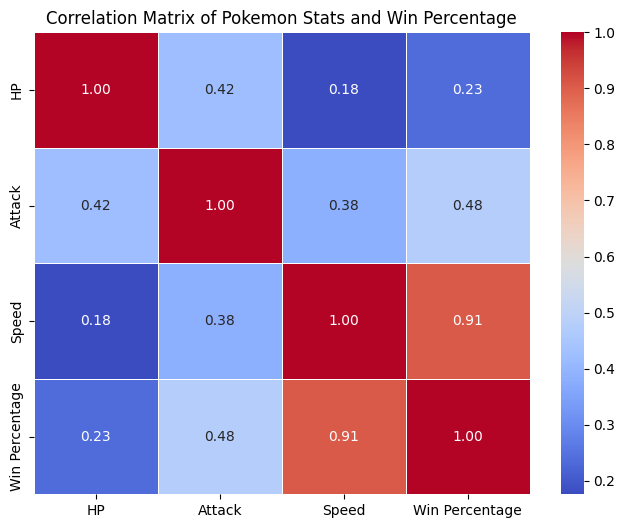

In [41]:
stats = pokemon[['HP', 'Attack', 'Speed', 'Win Percentage']]

#  calculate corr
correlation_matrix = stats.corr()


print(correlation_matrix)


#visualize
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Pokemon Stats and Win Percentage")
plt.show()

* The higher the speed, the more often the Pokemon wins.

* Attack power is also important, but not as critical as speed.

* HP has almost no effect on winning


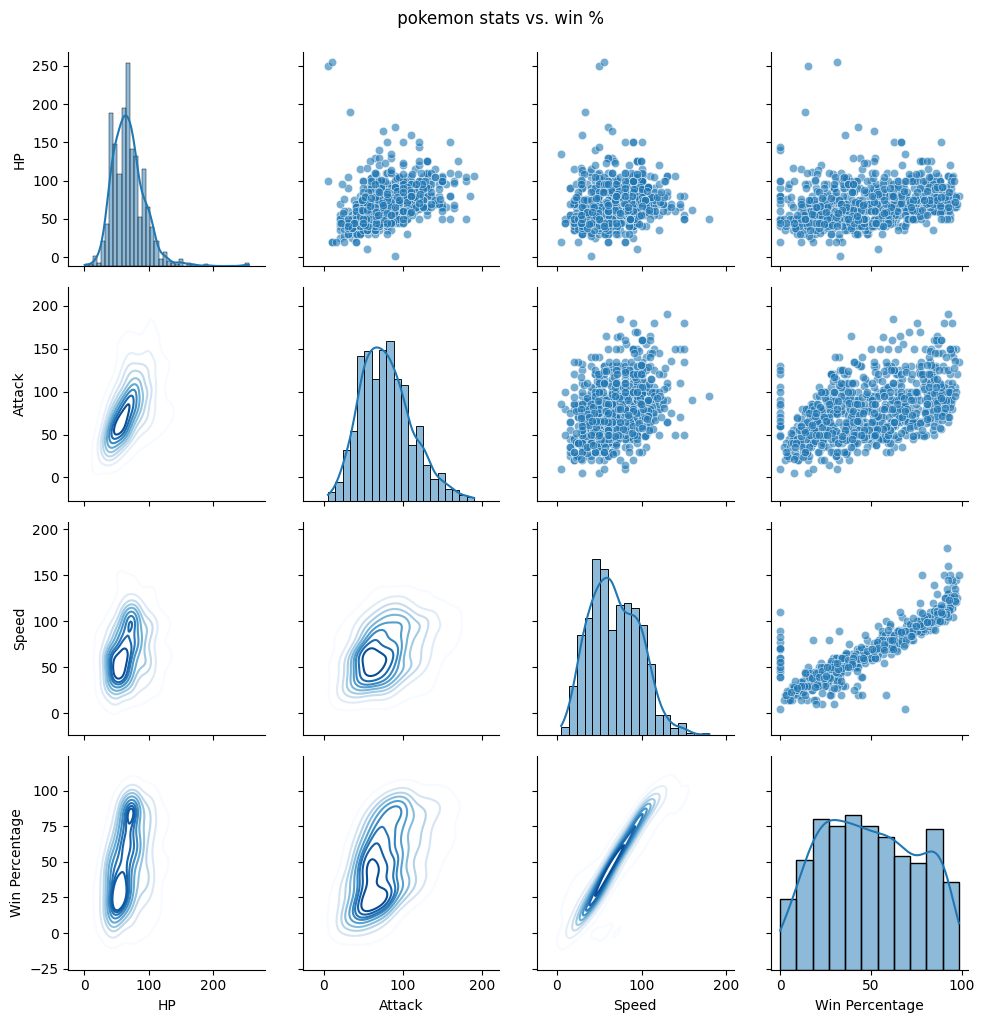

In [46]:
#PairGrid

# Selecting only relevant columns
stats = ["HP", "Attack", "Speed", "Win Percentage"]
df_stats = pokemon[stats]  # Assuming `pokemon` DataFrame is already prepared

# Creating a PairGrid
g = sns.PairGrid(df_stats)

# Different plots for diagonal, upper, and lower sections
g.map_upper(sns.scatterplot, alpha=0.6)  # Scatter plots in the upper triangle
g.map_diag(sns.histplot, kde=True)       # Histograms with KDE on the diagonal
g.map_lower(sns.kdeplot, cmap="Blues")   # KDE density plots in the lower triangle

# Adding a title
plt.suptitle(" pokemon stats vs. win % ", y=1.02)
plt.show()


Speed has the strongest impact on winning
Attack is somewhat important, but not as strong as SpeedHP is weakly correlated HP is weakly correlated with Win Percentage.

<Figure size 1200x600 with 0 Axes>

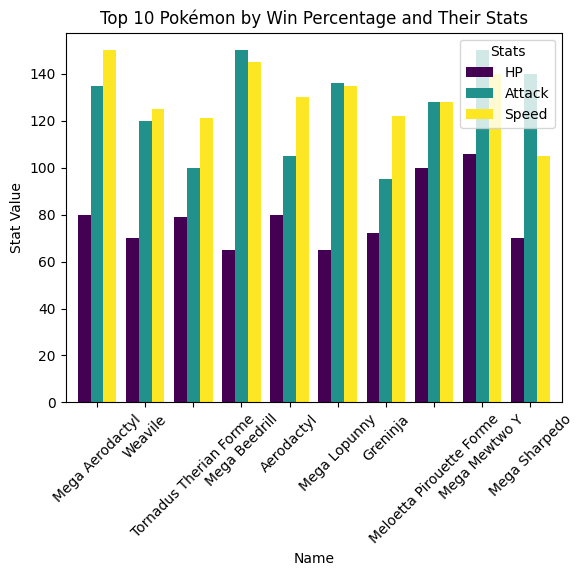

In [47]:
# lets do analize of top 10 pokemon from Win %


# Sort by win percentage and take the top 10
top_10_pokemon = pokemon.sort_values(by='Win Percentage', ascending=False).head(10)

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a grouped bar plot for HP, Attack, and Speed
top_10_pokemon.set_index('Name')[['HP', 'Attack', 'Speed']].plot(kind='bar', width=0.8, colormap='viridis')

# Title and labels
plt.title("Top 10 pokemon ")
plt.ylabel("Stat Value")
plt.xticks(rotation=45)
plt.legend(title="Stats")


plt.show()


As I can see speed has the strongest impact on win

## Models train


In [52]:
# split the data
features = ['HP', 'Attack', 'Speed']
target = 'Win Percentage'

X_train, X_test, y_train, y_test = train_test_split(pokemon[features], pokemon[target], test_size=0.2, random_state=42)

Linear Regression - MAE: 6.6023
Random Forest - MAE: 5.7746
XGBoost - MAE: 6.5217


<ipython-input-55-eab6de3c1685>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(mae_scores.keys()), y=list(mae_scores.values()), palette="viridis")


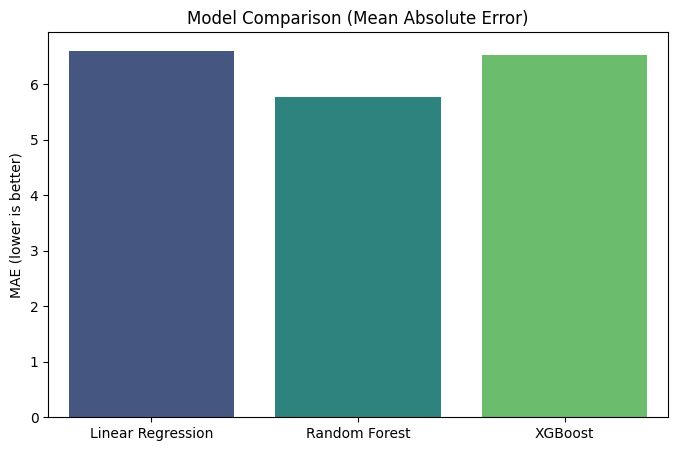

In [55]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
mae_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mae_scores[name] = mae
    print(f"{name} - MAE: {mae:.4f}")




# Compare MAE scores
plt.figure(figsize=(8, 5))
sns.barplot(x=list(mae_scores.keys()), y=list(mae_scores.values()), palette="viridis")
plt.title("Model Comparison (Mean Absolute Error)")
plt.ylabel("MAE (lower is better)")
plt.show()

Linear Regression has the highest MAE, meaning it performs the worst among the three models.

Random Forest achieves the lowest MAE, making it the best-performing model for predicting win percentage.